In [1]:
import os
import pickle
import re
import pandas as pd
import numpy as np
import pymorphy2
from functools import lru_cache

import fasttext
# https://stackoverflow.com/questions/17568612/how-to-make-numpy-argmax-return-all-occurrences-of-the-maximum

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 10, 5

sns.set(style='darkgrid')
sns.set(font_scale=1.5)

In [11]:
minilm = pd.read_csv('../models/predicts/0.90001_250_all_metrics.csv').reset_index()
minilm['model'] = 'minilm --'
minilm.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
45,45,0.326121,0.765933,0.221126,250,0,7418,11500,minilm --
46,46,0.343108,0.773246,0.238229,250,0,7432,11750,minilm --
47,47,0.461921,0.837060,0.362141,250,0,7434,12000,minilm --
48,48,0.392965,0.818102,0.285279,250,0,7436,12250,minilm --
49,49,0.400517,0.855424,0.288646,45,0,7436,12295,minilm --


In [12]:
adapted = pd.read_csv('../models/predicts/0.9_250_all_metrics.csv').reset_index()
adapted['model'] = 'minilm adapted'
adapted.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
55,55,0.409467,0.880107,0.287094,250,0,4782,14000,minilm adapted
56,56,0.502342,0.908523,0.390815,250,0,4792,14250,minilm adapted
57,57,0.554114,0.916210,0.451081,250,0,4810,14500,minilm adapted
58,58,0.523174,0.910911,0.414254,250,0,4816,14750,minilm adapted
59,59,0.491743,0.897106,0.382444,162,0,4819,14912,minilm adapted


In [13]:
fasttext = pd.read_csv('../models/predicts/0.97502_250_all_metrics.csv').reset_index()
fasttext['model'] = 'fasttext adapted'
fasttext.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
59,59,0.360853,0.889828,0.236997,250,0,3729,15000,fasttext adapted
60,60,0.415482,0.911940,0.293469,250,0,3739,15250,fasttext adapted
61,61,0.455489,0.929923,0.335778,250,0,3745,15500,fasttext adapted
62,62,0.433790,0.913954,0.311638,250,0,3748,15750,fasttext adapted
63,63,0.430814,0.916350,0.308166,232,0,3749,15982,fasttext adapted


In [14]:
all_ = pd.concat([minilm, adapted, fasttext], ignore_index=True)
all_

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
0,0,0.000000,0.000000,0.000000,250,5,0,250,minilm --
1,1,0.281000,0.398000,0.248233,250,161,0,500,minilm --
2,2,0.147089,0.236667,0.125167,250,33,0,750,minilm --
3,3,0.249141,0.398222,0.208889,250,36,0,1000,minilm --
4,4,0.225772,0.378963,0.188085,250,37,0,1250,minilm --
...,...,...,...,...,...,...,...,...,...
169,59,0.360853,0.889828,0.236997,250,0,3729,15000,fasttext adapted
170,60,0.415482,0.911940,0.293469,250,0,3739,15250,fasttext adapted
171,61,0.455489,0.929923,0.335778,250,0,3745,15500,fasttext adapted
172,62,0.433790,0.913954,0.311638,250,0,3748,15750,fasttext adapted


In [15]:
model_minilm = pd.read_csv('../models/predicts/0.90001_250_model_metrics.csv').reset_index()
model_minilm['model'] = 'minilm --'
model_minilm.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
22,22,0.818061,0.823609,0.816021,31,31,7354,10500,minilm --
23,23,0.797176,0.815433,0.788589,16,16,7370,10750,minilm --
24,24,0.811140,0.819075,0.807597,22,22,7392,11000,minilm --
25,25,0.839524,0.852528,0.833344,26,26,7418,11250,minilm --
26,26,0.859745,0.866725,0.856504,14,14,7432,11500,minilm --


In [16]:
model_adapted = pd.read_csv('../models/predicts/0.9_250_model_metrics.csv').reset_index()
model_adapted['model'] = 'minilm adapted'
model_adapted.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
30,30,0.922584,0.923848,0.923529,13,13,4708,12500,minilm adapted
31,31,0.936522,0.934920,0.942368,23,23,4731,12750,minilm adapted
32,32,0.953035,0.952923,0.955299,17,17,4748,13000,minilm adapted
33,33,0.957338,0.962614,0.957117,19,19,4774,13500,minilm adapted
34,34,0.970124,0.971846,0.970805,18,18,4810,14250,minilm adapted


In [17]:
model_fasttext = pd.read_csv('../models/predicts/0.97502_250_model_metrics.csv').reset_index()
model_fasttext['model'] = 'fasttext adapted'
model_fasttext.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
32,32,0.979828,0.985118,0.977211,16,16,3643,13000,fasttext adapted
33,33,0.958301,0.956749,0.967034,21,21,3672,13500,fasttext adapted
34,34,0.979376,0.980622,0.981415,15,15,3687,13750,fasttext adapted
35,35,0.979226,0.979124,0.982816,14,14,3701,14000,fasttext adapted
36,36,0.979256,0.986582,0.977660,16,16,3725,14500,fasttext adapted


In [18]:
model = pd.concat([model_minilm, model_adapted, model_fasttext], ignore_index=True)
model.head()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
0,0,0.645300,0.743627,0.609997,3831,3831,3831,5000,minilm --
1,1,0.603647,0.709313,0.568326,1480,1480,5311,5250,minilm --
2,2,0.595525,0.695405,0.562810,559,559,5870,5500,minilm --
3,3,0.587521,0.677844,0.557950,295,295,6165,5750,minilm --
4,4,0.614983,0.690743,0.590452,196,196,6361,6000,minilm --


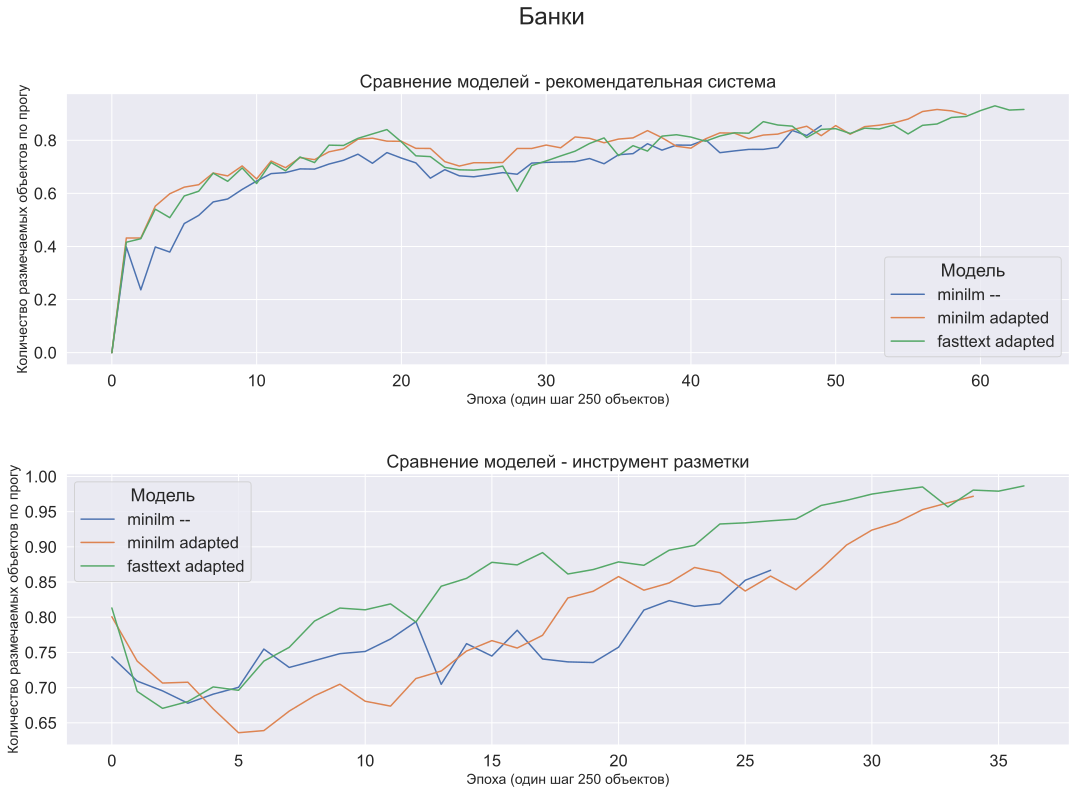

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
palette = sns.color_palette("Reds", as_cmap=True)


sns.lineplot(x="index", y="precision", data=all_, ax=ax[0], hue='model')
ax[0].set_title('Сравнение моделей - рекомендательная система', fontsize=18)
ax[0].set_xlabel('Эпоха (один шаг 250 объектов)', fontsize=14)
ax[0].set_ylabel('Количество размечаемых объектов по прогу', fontsize=14)
ax[0].legend(title='Модель')
# mean = all_fasttext.precision.mean()
# ax[0].plot([0, max(all_.index / 2)], [mean, mean])

sns.lineplot(x="index", y="precision", hue='model', data=model, ax=ax[1])
ax[1].set_title('Сравнение моделей - инструмент разметки', fontsize=18)
ax[1].set_xlabel('Эпоха (один шаг 250 объектов)', fontsize=14)
ax[1].set_ylabel('Количество размечаемых объектов по прогу', fontsize=14)
ax[1].legend(title='Модель')

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Банки", fontsize=24)
plt.savefig('saved_figure.jpg')
plt.show()

In [19]:
mold = pd.read_csv('../models/predicts/0.97_1000_model_metrics.csv').reset_index()
mold['model'] = '0.97 - 20000'
mold.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
122,122,0.925335,0.926891,0.924556,15,15,18974,127000,0.97 - 20000
123,123,0.929099,0.930280,0.928508,22,22,18996,128000,0.97 - 20000
124,124,0.951478,0.952391,0.951021,47,47,19043,129000,0.97 - 20000
125,125,0.960192,0.960890,0.959843,17,17,19060,130000,0.97 - 20000
126,126,0.916793,0.917330,0.916525,31,31,19091,131000,0.97 - 20000


In [20]:
mnew = pd.read_csv('../models/predicts/0.95_1000_model_metrics.csv').reset_index()
mnew['model'] = '0.95 - 38000'
mnew.tail()

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
106,106,0.829145,0.831118,0.828194,21,21,37964,111000,0.95 - 38000
107,107,0.849578,0.852598,0.848096,75,75,38039,112000,0.95 - 38000
108,108,0.829416,0.835048,0.826621,28,28,38067,113000,0.95 - 38000
109,109,0.795355,0.799922,0.793087,66,66,38133,114000,0.95 - 38000
110,110,0.851114,0.854514,0.849427,14,14,38147,115000,0.95 - 38000


In [22]:
model = pd.concat([mold, mnew], ignore_index=True)
model

,index,f1,precision,recall,validation_size,model_from_val,model_from_all,people_from_val,model
0,0,0.909164,0.912379,0.907556,1244,1244,1244,5000,0.97 - 20000
1,1,0.922983,0.924591,0.922180,269,269,1513,6000,0.97 - 20000
2,2,0.918909,0.927035,0.915312,179,179,1692,7000,0.97 - 20000
3,3,0.915697,0.921490,0.912956,218,218,1910,8000,0.97 - 20000
4,4,0.873644,0.882353,0.869496,273,273,2183,9000,0.97 - 20000
...,...,...,...,...,...,...,...,...,...
233,106,0.829145,0.831118,0.828194,21,21,37964,111000,0.95 - 38000
234,107,0.849578,0.852598,0.848096,75,75,38039,112000,0.95 - 38000
235,108,0.829416,0.835048,0.826621,28,28,38067,113000,0.95 - 38000
236,109,0.795355,0.799922,0.793087,66,66,38133,114000,0.95 - 38000


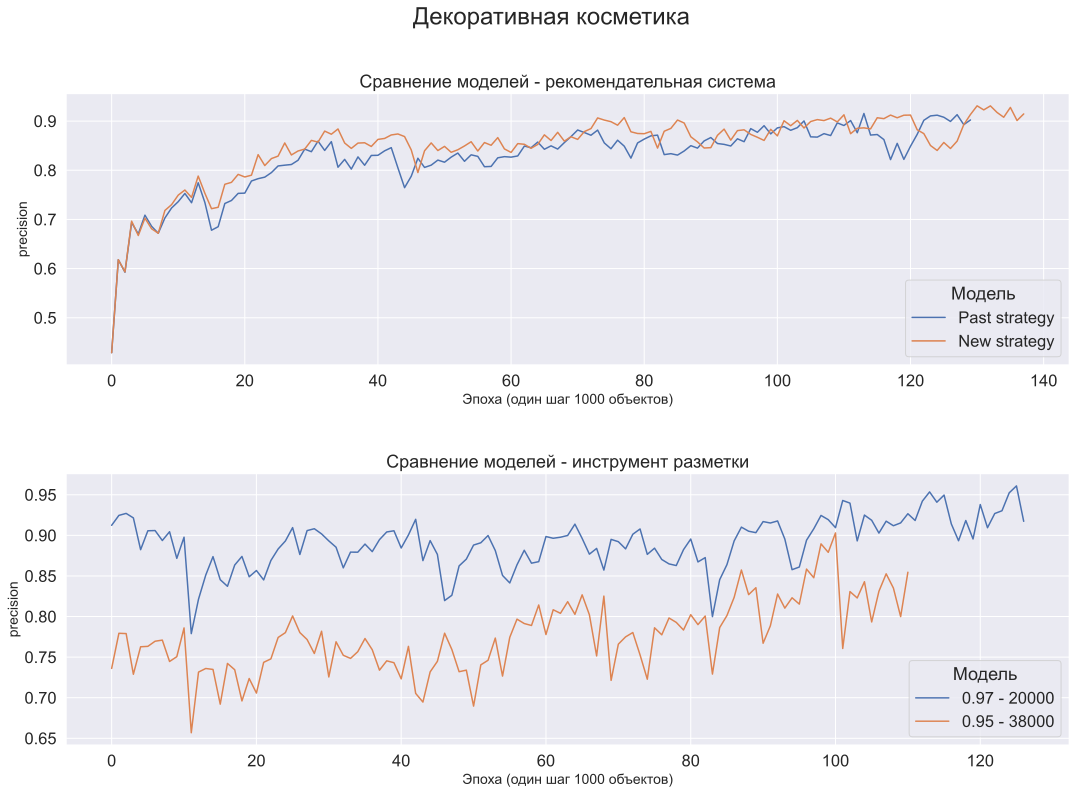

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 12))
palette = sns.color_palette("Reds", as_cmap=True)


sns.lineplot(x="index", y="precision", data=all_, ax=ax[0], hue='model')
ax[0].set_title('Сравнение моделей - рекомендательная система', fontsize=18)
ax[0].set_xlabel('Эпоха (один шаг 1000 объектов)', fontsize=14)
ax[0].set_ylabel('precision', fontsize=14)
ax[0].legend(title='Модель')
# mean = all_fasttext.precision.mean()
# ax[0].plot([0, max(all_.index / 2)], [mean, mean])

sns.lineplot(x="index", y="precision", hue='model', data=model, ax=ax[1])
ax[1].set_title('Сравнение моделей - инструмент разметки', fontsize=18)
ax[1].set_xlabel('Эпоха (один шаг 1000 объектов)', fontsize=14)
ax[1].set_ylabel('precision', fontsize=14)
ax[1].legend(title='Модель')

plt.subplots_adjust(hspace=0.4)
fig.suptitle("Декоративная косметика", fontsize=24)
plt.savefig('saved_figure.jpg')
plt.show()

In [26]:
df = pd.read_csv('../models/predicts/0.97_1000_end.csv')

In [37]:
df.loc[df['subtopic'] != df['true']].tail(15)

,phrase,subtopic,true
19446,хорошо фиксируется,эффективность,фиксация
19451,цену срок носки,стойкость,цена
19461,этой фирмы пользуюсь давно,производитель,период использования
19483,хорошо перекрывает все недостатки,плотность покрытия,эффективность
19484,хорошо подстраивается под цвет,способность подстраиваться под тон,эффективность
19510,цвета хорошо пигментированные,цвет/оттенок/тон,пигментация
19521,цвет становится более насыщенным,насыщенность,цвет/оттенок/тон
19603,чайная роза очень,цвет/оттенок/тон,цветы
19604,чайная роза очень красивый,цвет/оттенок/тон,цветы
19619,шоколадный мусс соответствует,цвет/оттенок/тон,продукт
